<a href="https://colab.research.google.com/github/yashsarda18/TASK1/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [1]:

import open3d as o3d

In [3]:
from google.colab import files

In [5]:
data = o3d.io.read_point_cloud("/content/conference.pcd")

In [6]:
o3d.visualization.draw_geometries([data])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [7]:
data_array = np.asarray(data.points)

Getting hands on with the data

In [13]:
df = pd.DataFrame(data_array)

In [14]:
column_names = ['X', 'Y', 'Z']
df.columns = column_names

In [15]:
df.head()

,X,Y,Z
0,1.124045,0.513956,-1.591163
1,1.120461,0.407941,-1.583803
2,1.128403,0.449776,-1.582692
3,1.142245,0.492531,-1.589774
4,1.129466,0.508323,-1.580277


In [16]:
df.describe()

,X,Y,Z
count,994153.000000,994153.000000,994153.000000
mean,-0.860820,-0.144153,0.171625
std,1.664546,1.616057,0.873009
min,-5.156947,-3.546435,-1.591163
25%,-2.091689,-1.278983,-0.491623
50%,-0.566049,0.010651,0.083491
75%,0.544454,1.158773,0.787195
max,1.996790,3.073378,2.573509


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994153 entries, 0 to 994152
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       994153 non-null  float64
 1   Y       994153 non-null  float64
 2   Z       994153 non-null  float64
dtypes: float64(3)
memory usage: 22.8 MB


No preprocessing needed. We can proceed with further steps

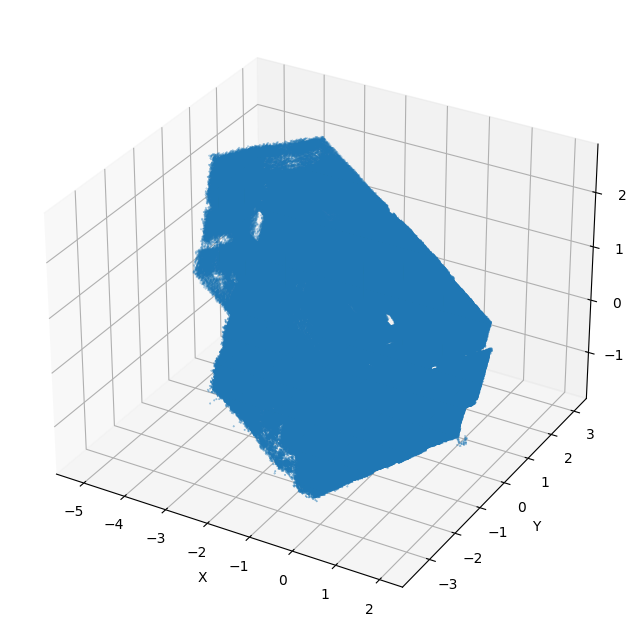

[[ 1.12404513  0.51395601 -1.5911628 ]
 [ 1.12046051  0.40794063 -1.58380282]]


In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_array[:, 0], data_array[:, 1], data_array[:, 2], s=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show();
print(data_array[:2])

In [ ]:
data_array[:5]

array([[ 1.12404513,  0.51395601, -1.5911628 ],
       [ 1.12046051,  0.40794063, -1.58380282],
       [ 1.12840295,  0.44977623, -1.58269215],
       [ 1.14224529,  0.49253079, -1.58977413],
       [ 1.1294657 ,  0.50832278, -1.58027744]])

In [ ]:
len(data_array)

994153

In [ ]:
tensor_data = tf.convert_to_tensor(data_array)

In [ ]:
tensor_data[:5]

<tf.Tensor: shape=(5, 3), dtype=float64, numpy=
array([[ 1.12404513,  0.51395601, -1.5911628 ],
       [ 1.12046051,  0.40794063, -1.58380282],
       [ 1.12840295,  0.44977623, -1.58269215],
       [ 1.14224529,  0.49253079, -1.58977413],
       [ 1.1294657 ,  0.50832278, -1.58027744]])>

In [ ]:
tensor_data.shape

TensorShape([994153, 3])

Performing KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

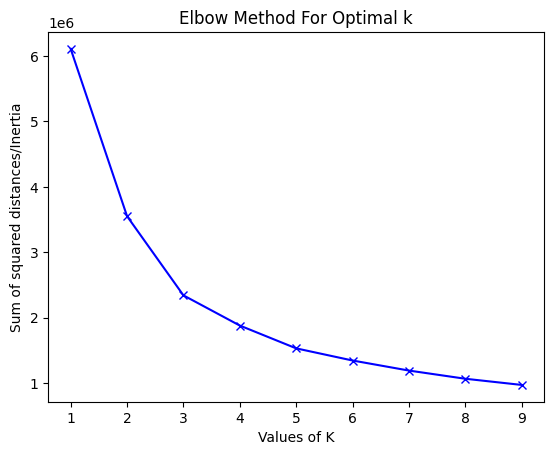

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_array)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Sum of squared distances/Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

According to elbow method , we can take number of clusters = 3

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
print("Centers: ",centers)
print("Labels: ",labels)

Centers:  [[ 0.35213598  0.33652176 -0.25572195]
 [-2.83140604  1.19119371  0.79715703]
 [-0.63576994 -2.19959914  0.16199927]]
Labels:  [0 0 0 ... 1 1 1]


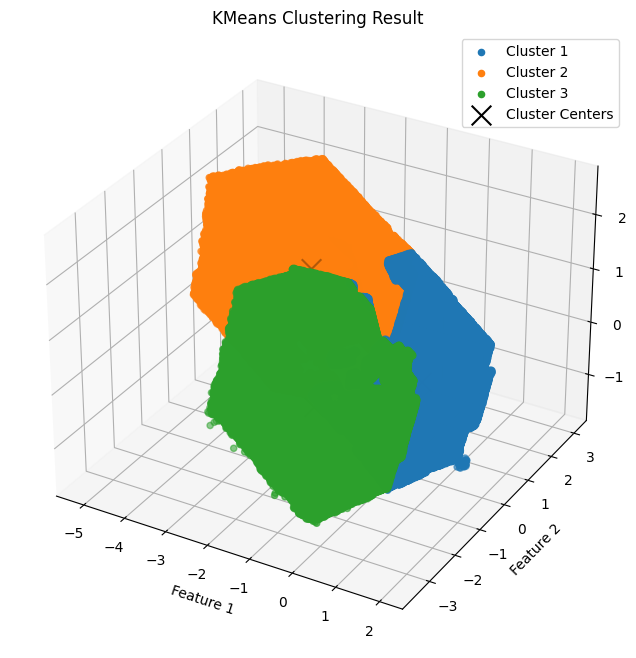

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each cluster
for i in range(len(centers)):
    cluster_data = data_array[labels == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {i+1}')

# Plot cluster centers as larger points with a different color
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=200, c='black', marker='x', label='Cluster Centers')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Result')
ax.legend()
plt.show()


As elbow was between 3 and 4 , lets try with 4 clusters

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centers: ",centers)
print("Labels: ",labels)
len(centers), len(labels)

Centers:  [[-3.32150655  1.22630915  0.99719323]
 [ 0.85937254 -0.43830935 -0.36556566]
 [-0.74628265  1.05570386  0.01070202]
 [-0.92665497 -2.30744948  0.28244331]]
Labels:  [1 1 1 ... 0 0 0]


(4, 994153)

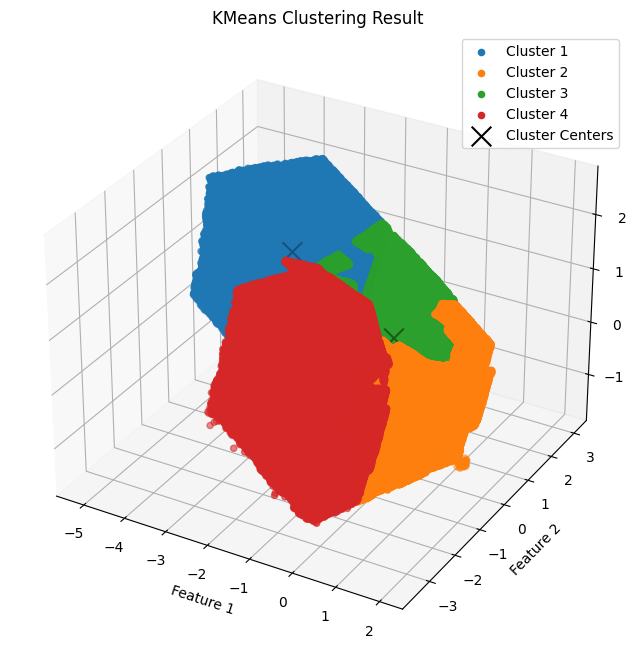

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each cluster
for i in range(len(centers)):
    cluster_data = data_array[labels == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {i+1}')

# Plot cluster centers as larger points with a different color
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=200, c='black', marker='x', label='Cluster Centers')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Result')
ax.legend()
plt.show()


Saving the clusters as PCD files

In [ ]:
# Create PointCloud objects for each cluster

cluster_point_clouds = []
for i in range(k):
    cluster_data = data_array[labels == i]
    cluster_pcd = o3d.geometry.PointCloud()
    cluster_pcd.points = o3d.utility.Vector3dVector(cluster_data)
    cluster_point_clouds.append(cluster_pcd)

# Save each cluster's PointCloud to a separate PCD file
for i, cluster_pcd in enumerate(cluster_point_clouds):
    o3d.io.write_point_cloud(f'cluster_{i}.pcd', cluster_pcd)
    print(f"Cluster {i} saved as cluster_{i}.pcd")


Cluster 0 saved as cluster_0.pcd
Cluster 1 saved as cluster_1.pcd
Cluster 2 saved as cluster_2.pcd
Cluster 3 saved as cluster_3.pcd


In [ ]:
# Calculate the length (number of data points) in each cluster
cluster_lengths = np.bincount(labels)

# Print the length of each cluster
for i, length in enumerate(cluster_lengths):
    print(f"Cluster {i}: {length} data points")

Cluster 0: 204755 data points
Cluster 1: 285243 data points
Cluster 2: 265402 data points
Cluster 3: 238753 data points


Lets visualise the centers of the clusters

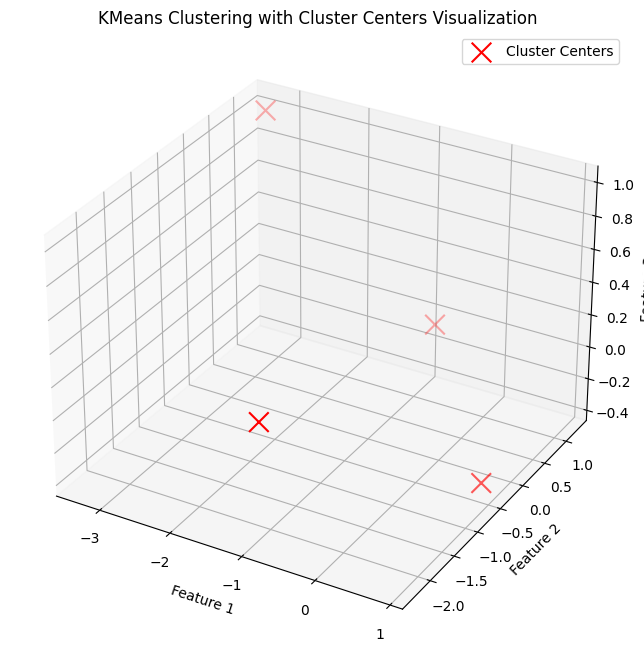

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=200, label='Cluster Centers')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering with Cluster Centers Visualization')
ax.legend()
plt.show();